# Decision boundary (frontera de decision)
Repaso de la regresion logistica que hemos estado estudiando en las dos ultimas clases.


$$h(\theta, x^{(i)}) = S( x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}} .$$
donde $\theta$ es un vector columna  $(\theta_1, \theta_2, \cdots , \theta_n)^T $ de $n$ dimensiones y $x^{(i)}$ es un vector fila de $n$ dimensiones.

Sin embargo esta hipotesis esta definida sobre continuo. En la practica si necesitamos hacer una clasficacion binaria debemos mejorarla. Una mejora es, dado un "theshold" $\gamma=0.5$


\begin{eqnarray}
h_{binaria} = \left \{
    \begin{array}{cc}
    1 & \text{ si } S( x^{(i)} \theta) > 0.5 \\
    0 & \text{ de lo contrario }
    \end{array}
    \right .
\end{eqnarray}
El argumento de la funcion sigmoid es un hiperplano,
$x^{(i)} \theta = 0$


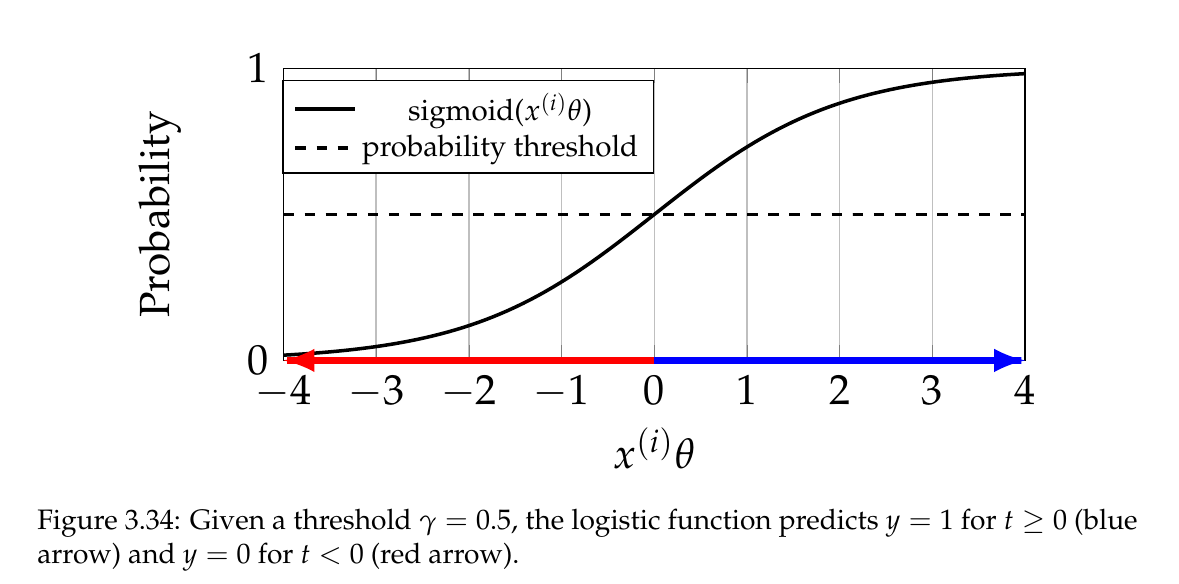

El punto critico, donde la hipotesis pasa de 0 a 1 (negativo a positivo) es el valor $x^{(i)} \theta = 0$. Esto es un hiperplano y este hiperplano lo llamamos la **frontera de decision**.

El caso mas simple es cuando  $ \theta \in \mathbb{R}^2$  y este es de una recta.

Como se halla la frontera de decision?

* Use la hipotesis $h(\theta, x^{(i)})$ junto con la funcion de costo (clase anterior)

* Use el gradiente de la funcion de costo junto con un metodo de descenso del gradiente para obtener el $\theta$ optimo.

* Como ya tenemos $\theta$, dibuje el hiperplano $x^T \theta$
en la variable $x$.

Que pasa si queremos generalizar el hiperplano a una superficie.

Por ejemplo, considere la nueva hipotesis


$$h(\theta, X) = S( g(\theta, X)). $$
donde aca $g$ puede ser, por ejemplo, un polinimo en dos variables de grado 8.

Por ejemplo. $\theta=(\theta_0, \theta_1, \cdots, \theta_8)$,
$X=(x_1, x_2)$

$$g(\theta, X) = \sum_{i=0}^{8} \sum_{j=0}^i \theta_{[i(i+1)/2+j]} x_2^{j} x_1^{i-j} =0 .$$
La razon del indice en $\theta$ es por que es vectorizado, en vez de usar $\theta_{ij}$ queremos usar un solo indice, desde 0 hasta 8. Hay un ejercicio que pregunta sobre esto.



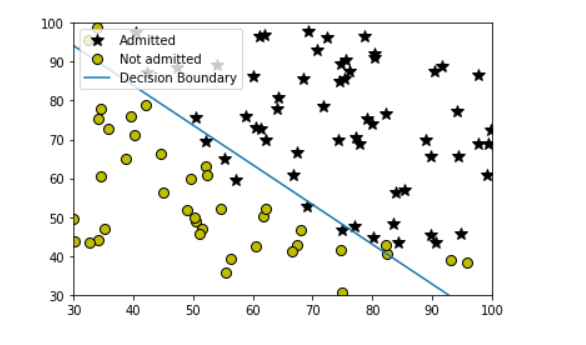

La figura anterior muestra un ejemplo (de la tarea) donde hay una separacion con hiperplano (recta azul: frontera de decision)

## Regularizacion.
La regularizacion de Tikhonov implica sumarle un termino a la funcion de costo. Este termino es la norma al cuadrado de $\theta$, con algun coeficiente.


$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)}] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})] + \frac{\lambda}{2 m} \| \theta \|^2 \tag{1}  .$$

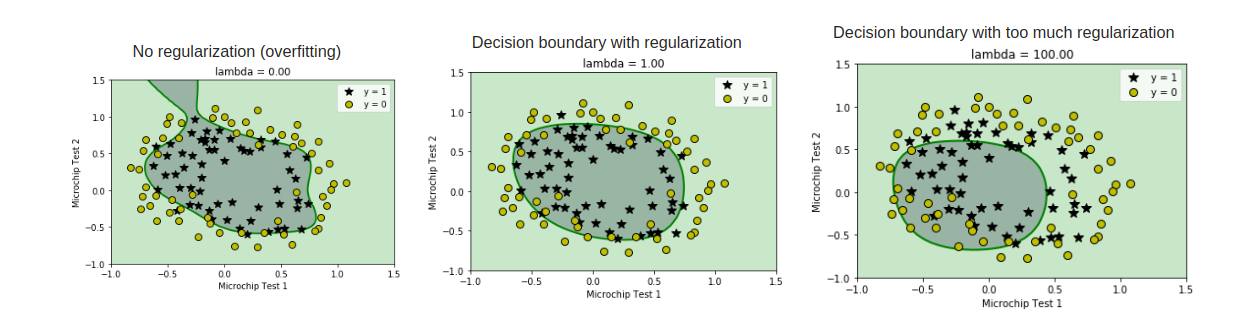

En la primera figura de la izquierda. Se ve como un signo de "overfitting" por que la curva no se cierra. Se ajusta muy a los puntos pero no se cierra. La del medio usa $\lambda=1.0$ y se ve mejor. La figura de la derecha muestra un $\lambda=100$, y ya aca hay "underfitting".

## Clasificacion multiclase.
Mientras la clasificacion binaria es muy comun. Pero existen muchos casos en donde la clasificacion requiere 3 o mas categorias. Por decir algo, perros, gatos, conejos.


La pregunta es, como hacemos esto?


Para introducimos la generalizacion de la funcion sigmoid. Llamada **softmax regression**. Es decir una probabilidad para mas de dos objetos. Y si son dos, se reduce a la sigmoid clasica.

La **softmax regression**
Asumamos que tenemos $K$ clases ($K \ge 3$)

\begin{eqnarray}
\sigma : \mathbb{R}^{K} &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)} \quad  , \quad i=1,2, \cdots, K \quad ,  \quad z_i \in \mathbb{R}
\end{eqnarray}




Se ve facilmente que la suma de todos los $\sigma(z_i)$ es 1,
ademas $\sigma(z_i) \ge 0$.

Definamos la hipotesis para el caso de $K \ge 3$.

\begin{eqnarray}
h(\theta, x) = \begin{pmatrix} P(y=1 | x; \theta) \\ P(y=2 | x; \theta)  \\ \vdots \\ P(y=K | x; \theta) \end{pmatrix}
=
\begin{pmatrix} \sigma(z_1) \\ \sigma(z_2) \\ \vdots \\ \sigma(z_K)\end{pmatrix} = \frac{1}{\sum_{j=1}^K \exp( (\theta^{(j)})^T x)} \begin{pmatrix}
\exp((\theta^{(1)})^T x  \\
\exp((\theta^{(2)})^T x  \\
\vdots \\
\exp((\theta^{(K)})^T x  \\
\end{pmatrix}
\end{eqnarray}

Donde $z^{(i)}=(\theta^{(i)})^T x.$


Para estos problemas de optimizacion necesitamos la funcion de costo y su gradiente.

Podemos usar la misma funcion de costo (logistica) (1), con $h(\theta, x)$ tal y como esta definido aca.

Tambien necesitamos el gradiente de la funcion de costo.

La forma de encontrar el gradiente de la funcion de costo es, igual a la que hizo para el caso binario, pero aca los productos y las sumas son dobles, por que son  sobre el numero de clases y el numero de muestras.

El metodo para hallar la funcion de costo es:

* Se escribe la funcion de probabilidad para cada muestra $h(\theta, ,x)$.
* Se halla el "verosimilitud" (la probabilidad para todas las muestras y todas las clases (doble productoria)
* Se halla el logaritmo de  la "verosimilitud"
* Se cambia el signo para pasar de concava a convexa.


El resultado es (esto se deja como ejercicio al estudiante)

$$J(\theta) = - \left [
    \sum_{i=1}^m \sum_{k=1}^K
    \mathbb{1} ( y^{(i)} = k ) \log \frac{\exp((\theta^{(k)})^T x}{\sum_{j=1}^K \exp ( (\theta^{(j)})^T x}
    \right ]  .$$

donde la funcion **indicator** se define como

\begin{eqnarray}
\mathbb{1}(x) = \left \{
    \begin{array}{cc}
    1 & \text{ si } x \quad \text{es verdad} \\\
    0 & \text{ de lo contrario}
    \end{array}
    \right .
\end{eqnarray}



Finalmente necesitamos el gradiente de $J$, es decir $\nabla J(\theta)$.

Se puede probar

$$\nabla_{\theta} J(\theta) =  - \sum_{i=1}^m \left [   
   x^{(i)} \left ( \mathbb{1}(y^{(i)}=k) - p(y^{(i)}=k | x^{(i)}; \theta   \right ) \right ].$$



En computadores todos son numeros. Necesitamos convertir variables categoricas (perro, gato, conejo) a numeros. Para esto es comun, usar lo que se llama **one-hot encoding**.

Por ejemplo.

\begin{eqnarray}
y^{(1)} &=& (1, 0, 0) \quad \text{gato} \\
y^{(2)} &=& (0, 1, 0) \quad \text{perro} \\
y^{(3)} &=& (0, 0, 1) \quad \text{conejo} \\
\end{eqnarray}

Con esta notacion podemos construir la matriz $Y$ de los tres vectores de arriba (la identidad $3 \times 3$ y escribir el problema como


Conceptualmente:

$$ X \Theta = Y \quad , X \in \mathbb{R}^{m \times n} \quad , \quad \Theta \in \mathbb{R}^{n \times 3} \quad , \quad Y \in \mathbb{R}^{m \times 3} .$$

En generral para $K$ clasess podemos pensar

$$ X \Theta_i = Y_i  \quad, \quad i=1,2, \cdots , k .$$

## Uno contra todos (uno contra el resto).
Otra forma de hacer multiclase es usar el metodo **uno contra el resto**. En que consiste.


* Asuma que se tiene $K$ clases ( $K \ge 2$).
* Se toma la primera clase $k=1$, el resto son las clases $k=2,3, \cdots, k$. Se separan en estos dos grupos.
* Como son dos grupos se usa el metodo binario de las clases anteriores. Se halla $h_1(\theta,x)$
* Se toma la clase 2 en un lado y las clases $k=1,3, \cdots, K$ en otro, se resuelve el problema binario y se crea $h_2(\theta, x)$.
* Asi suscesivamente. Se toma la clase $k=i$ en un lado y las classes $k=1,2, \cdots, i-1, i+1, \cdots K$ de otro lado, se resuelve el problema binario y se halla $h_i(\theta, x)$.
* Al final se toman las clases $k=1,2, \cdots, K-1$ en un lado y $k=K$ en otro. Se resueleve el problema binario y se encuentra $h_K(\theta)$.


Al final, para cada muestra $x$, la hipotesis que se usa
es la de mayor probabilidad.


$$h(\theta, x) = \max_{i=1}^K h_i(\theta, x) .$$



Veamos un ejemplo para 3 clases.



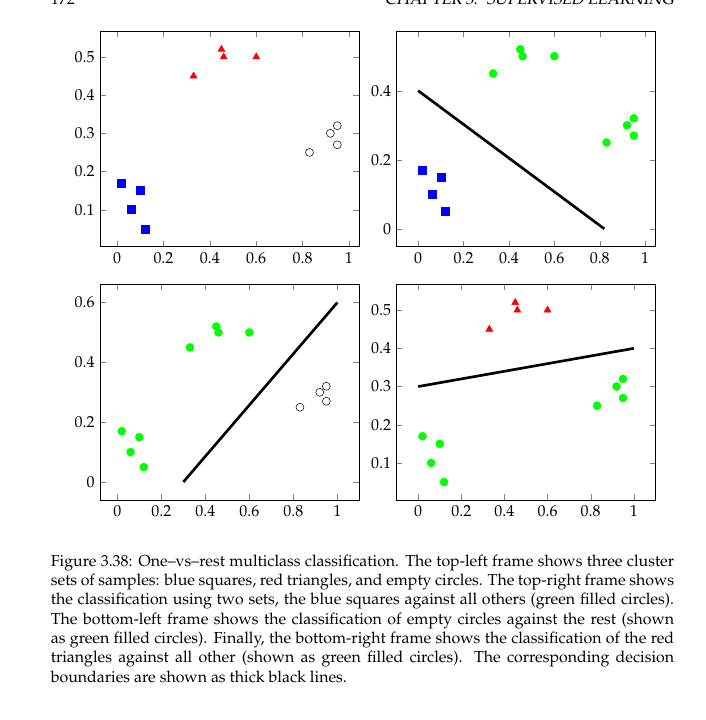

## Proxima clase: Analisis de precision de clasificacion.